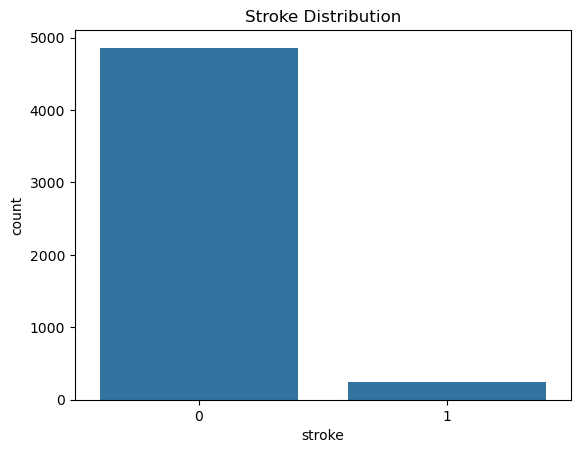

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64
               age  avg_glucose_level          bmi
count  5110.000000        5110.000000  4909.000000
mean     43.226614         106.147677    28.893237
std      22.612647          45.283560     7.854067
min       0.080000          55.120000    10.300000
25%      25.000000          77.245000    23.500000
50%      45.000000          91.885000    28.100000
75%      61.000000         114.090000    33.100000
max      82.000000         271.740000    97.600000


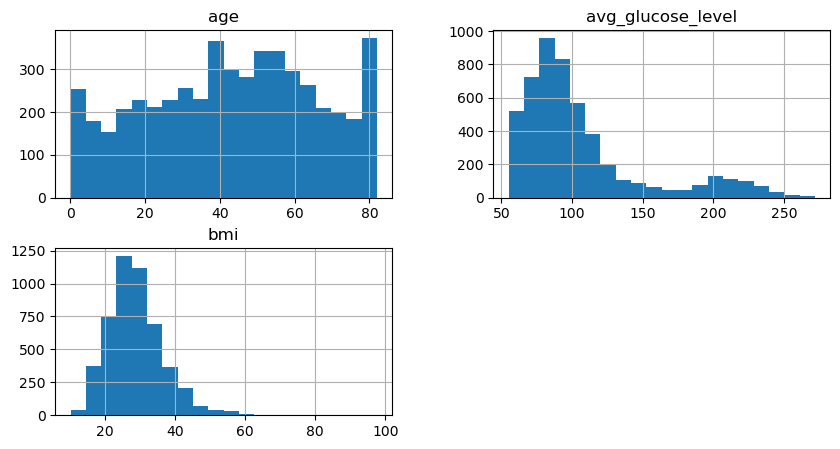

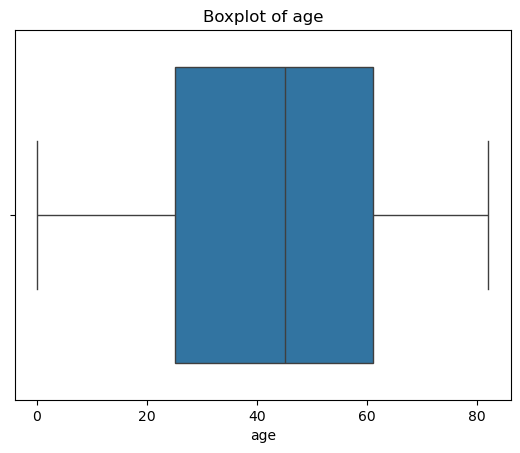

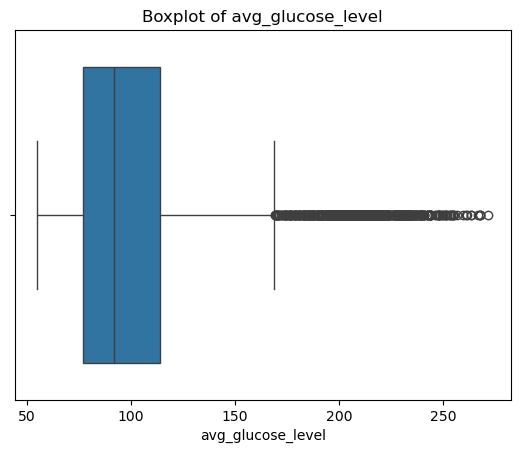

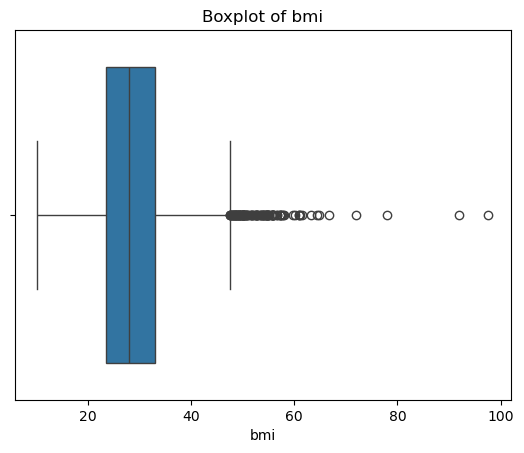

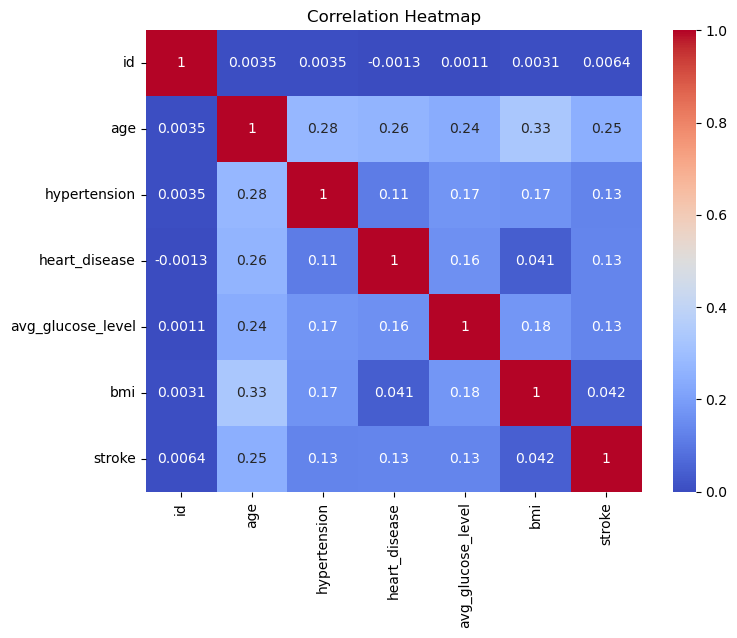

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
id                   0.006388
Name: stroke, dtype: float64


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df

# 1. Distribution of target
sns.countplot(x="stroke", data=df)
plt.title("Stroke Distribution")
plt.show()
print(df["stroke"].value_counts(normalize=True))  # class balance

# 2. Basic statistics for numerical features
print(df[["age","avg_glucose_level","bmi"]].describe())

# 3. Histograms & Boxplots
df[["age","avg_glucose_level","bmi"]].hist(bins=20, figsize=(10,5))
plt.show()

for col in ["age","avg_glucose_level","bmi"]:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# 4. Correlation coefficients
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 5. Identify strongly correlated features
print(corr["stroke"].sort_values(ascending=False))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# Create a missing BMI indicator
df['bmi_missing'] = df['bmi'].isna().astype(int)

In [9]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_missing
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,1
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0


In [10]:
# Simple mean imputation
df['bmi_imputed_mean'] = df['bmi'].fillna(df['bmi'].mean())

# Median imputation
df['bmi_imputed_median'] = df['bmi'].fillna(df['bmi'].median())

# Group-based imputation (more accurate)
df['bmi_imputed_group'] = df.groupby(['gender', 'age'])['bmi'].transform(
    lambda x: x.fillna(x.median()))

In [11]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_missing,bmi_imputed_mean,bmi_imputed_median,bmi_imputed_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0,36.600000,36.6,36.6
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,1,28.893237,28.1,29.3
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,32.500000,32.5,32.5
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,34.400000,34.4,34.4
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,24.000000,24.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,1,28.893237,28.1,27.6
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0,40.000000,40.0,40.0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0,30.600000,30.6,30.6
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0,25.600000,25.6,25.6


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

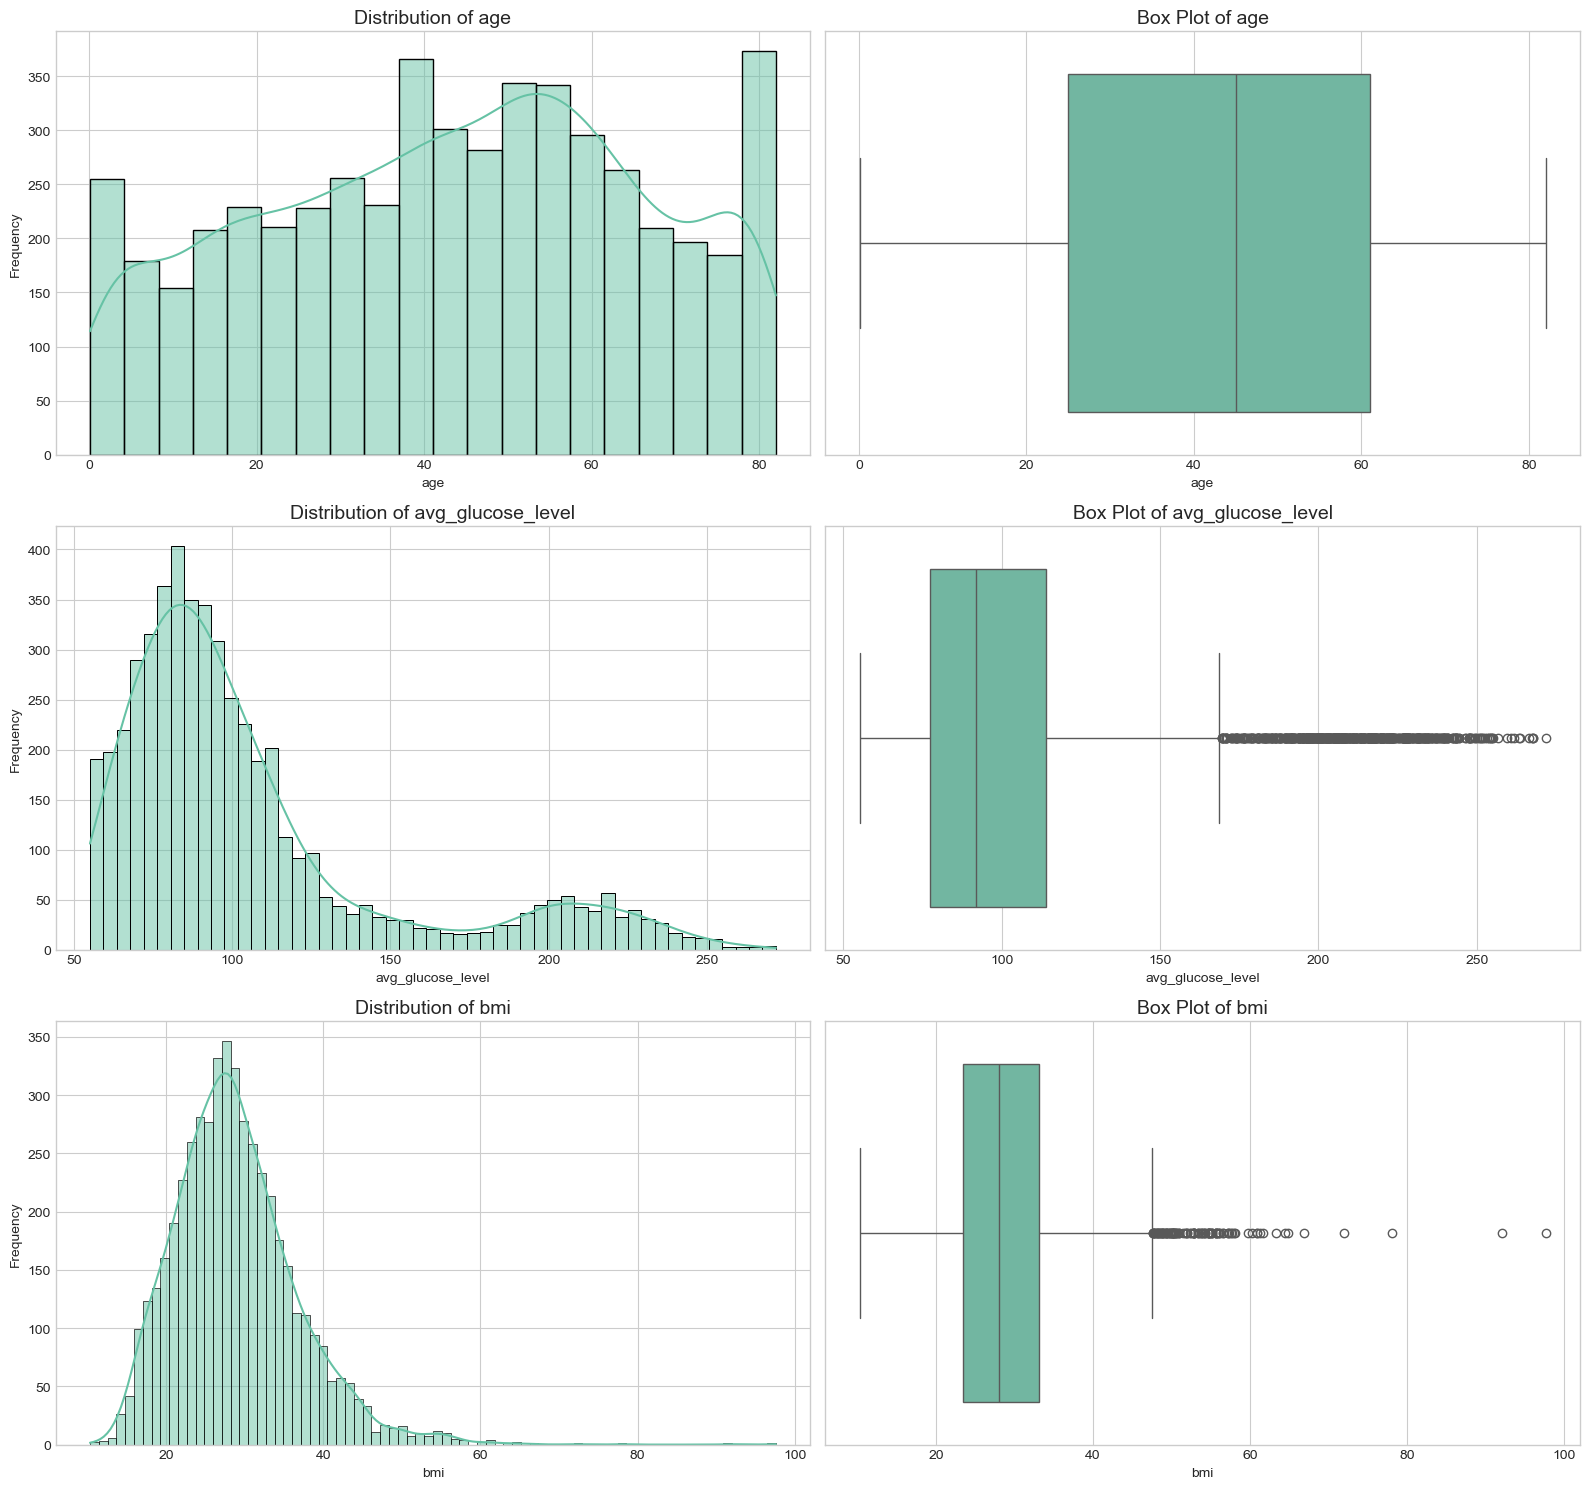

In [13]:
# Identify numerical columns
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

# Create histograms and box plots for numerical features
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(16, 5*len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    # Histogram with KDE
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {col}', fontsize=14)
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')
    
    # Box plot
    sns.boxplot(x=df[col].dropna(), ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {col}', fontsize=14)
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

/var/folders/6x/0vc_lgln2mn7lyj28xbgmsy40000gn/T/ipykernel_7619/3300887471.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=col, data=df, ax=axes[i, 1],
/var/folders/6x/0vc_lgln2mn7lyj28xbgmsy40000gn/T/ipykernel_7619/3300887471.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=col, data=df, ax=axes[i, 1],
/var/folders/6x/0vc_lgln2mn7lyj28xbgmsy40000gn/T/ipykernel_7619/3300887471.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=col, data=df, ax=axes[i, 1],


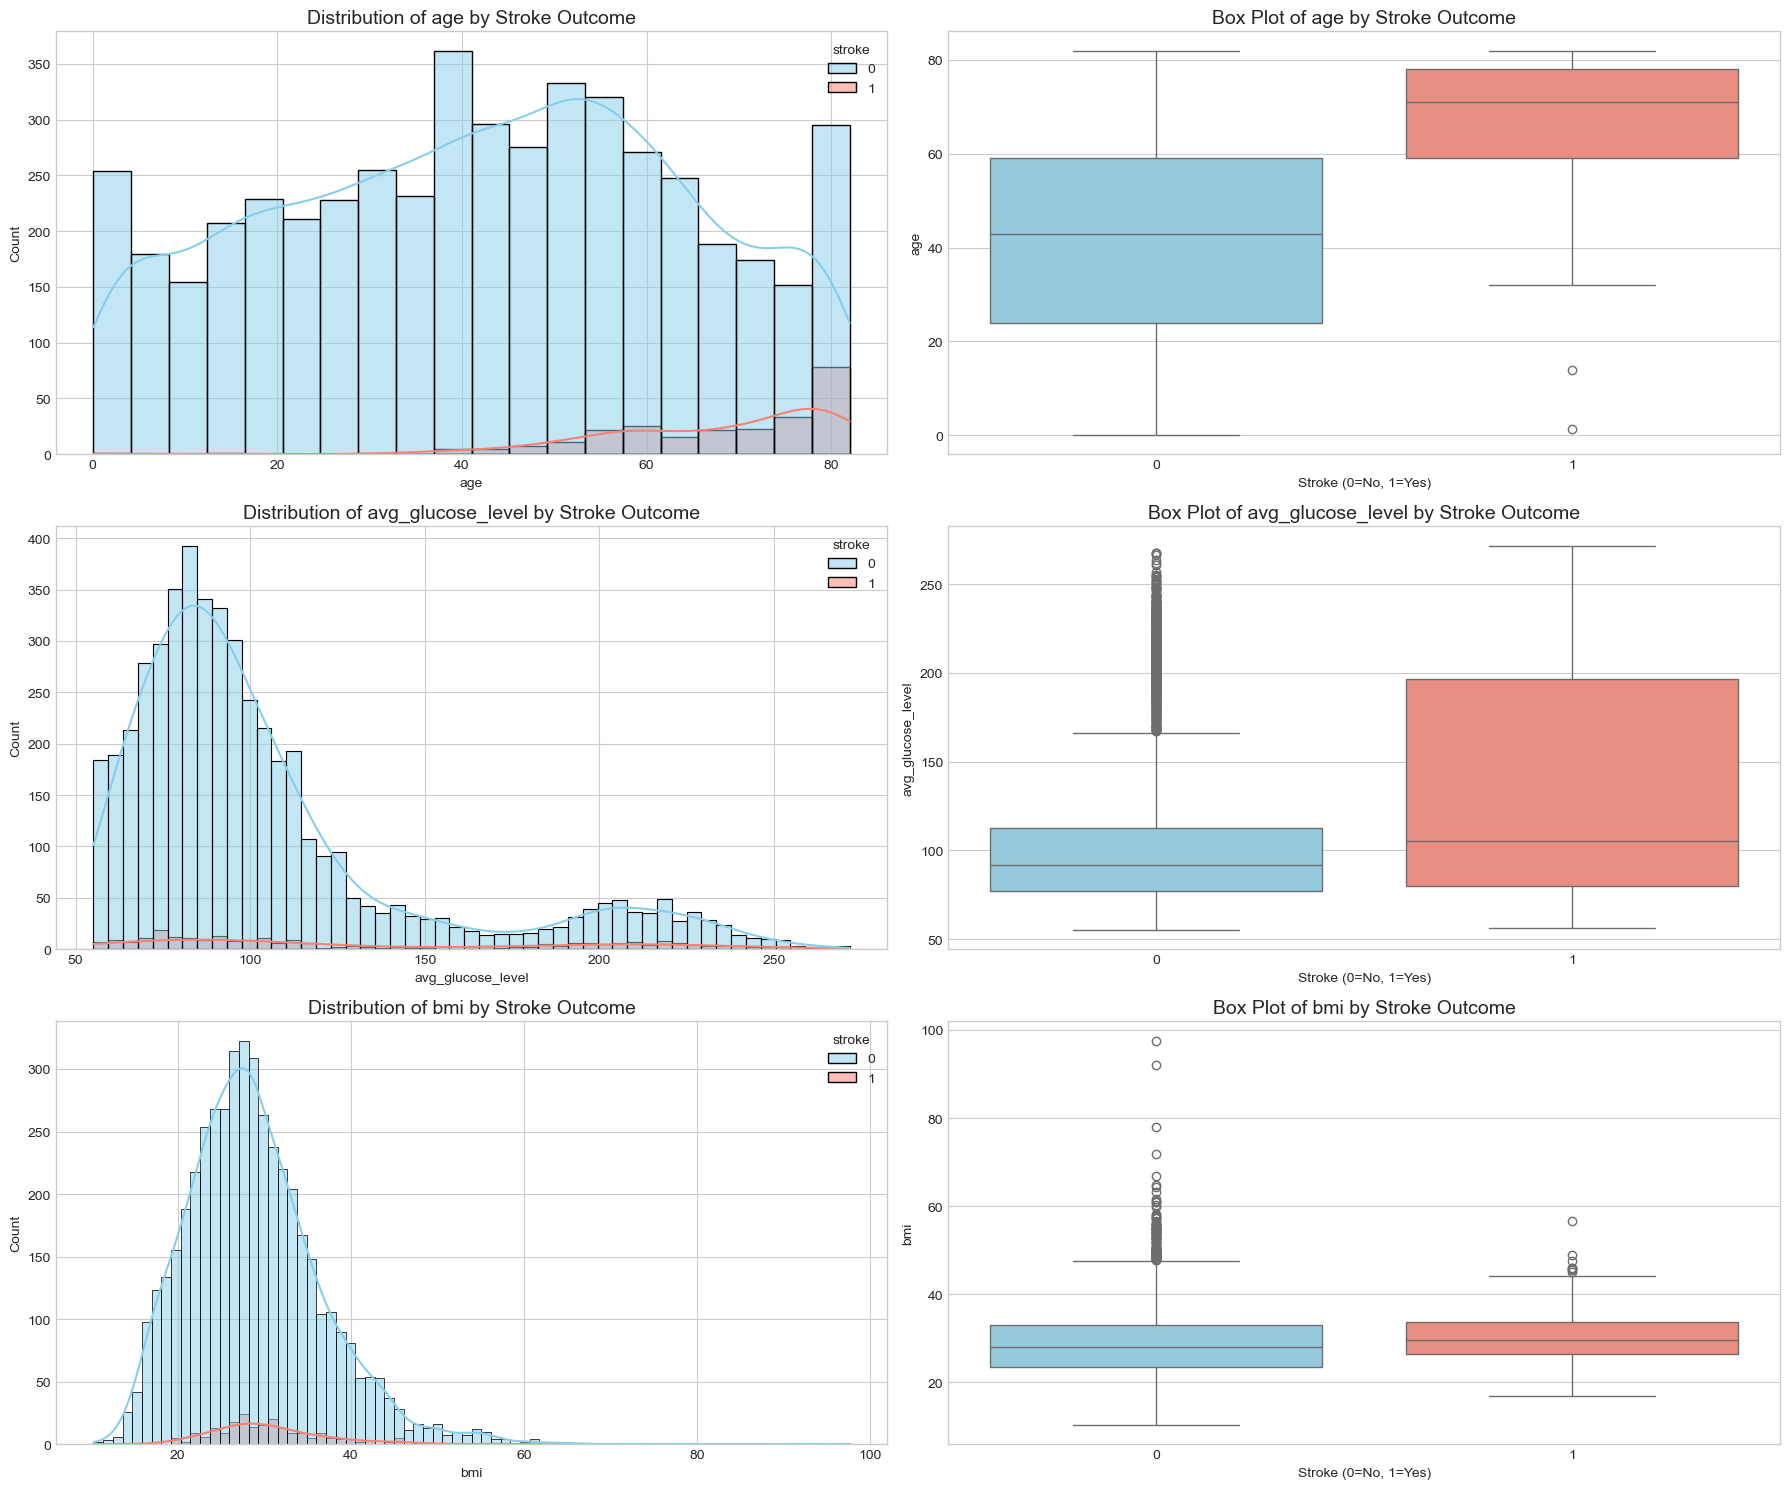

In [14]:
# Create histograms and box plots split by stroke outcome
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(18, 5*len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    # Histogram by stroke outcome
    sns.histplot(data=df, x=col, hue='stroke', kde=True, ax=axes[i, 0], 
                 common_norm=False, palette=['skyblue', 'salmon'])
    axes[i, 0].set_title(f'Distribution of {col} by Stroke Outcome', fontsize=14)
    
    # Box plot by stroke outcome
    sns.boxplot(x='stroke', y=col, data=df, ax=axes[i, 1], 
                palette=['skyblue', 'salmon'])
    axes[i, 1].set_title(f'Box Plot of {col} by Stroke Outcome', fontsize=14)
    axes[i, 1].set_xlabel('Stroke (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

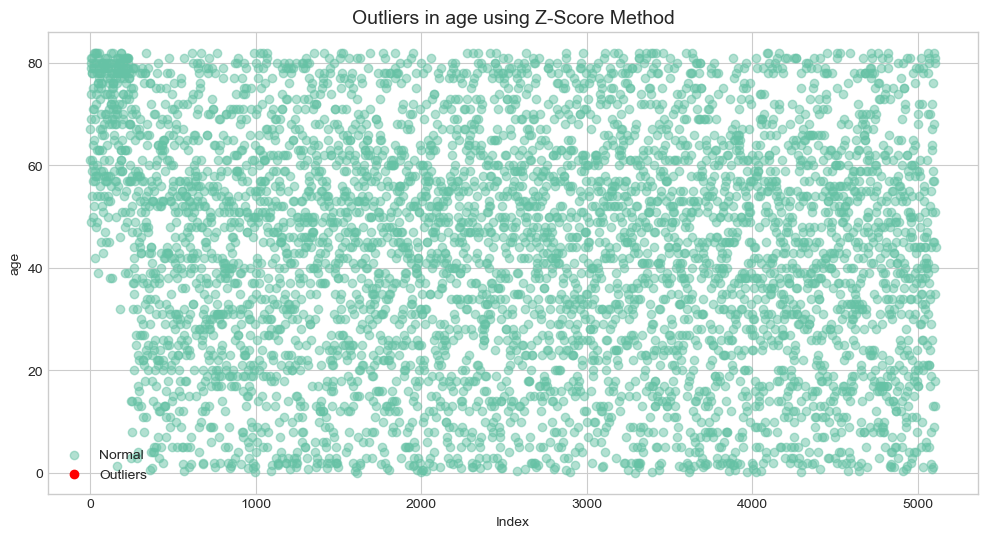

Number of outliers in age: 0
--------------------------------------------------


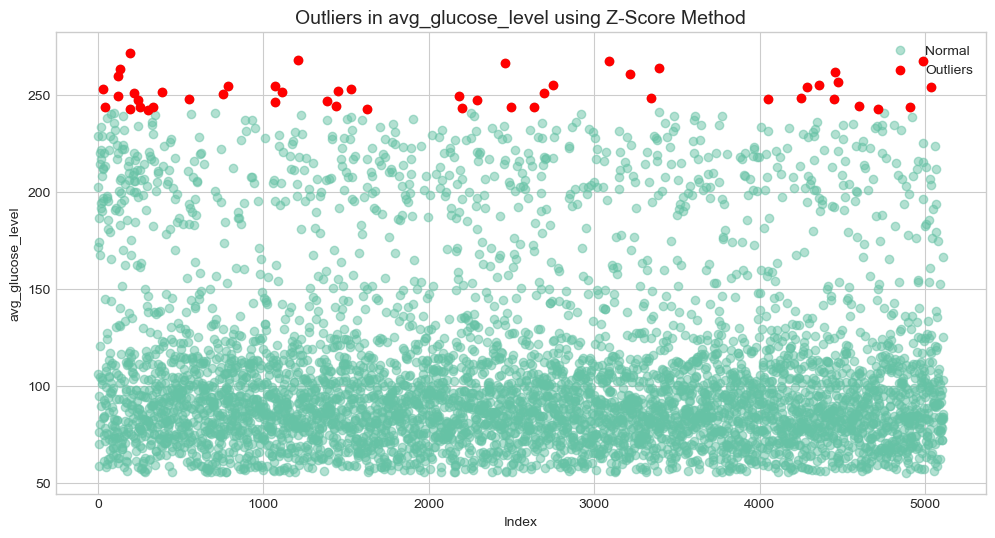

Number of outliers in avg_glucose_level: 49
Outlier values: [252.72 243.58 259.63 249.31 263.32 271.74 242.52 250.89 247.51 243.53
 242.3  243.5  251.6  247.69 250.2  254.6  254.63 246.34 251.46 267.76
 246.53 244.28 251.99 253.16 242.84 249.29 242.94 247.48 266.59 243.73
 243.59 250.8  255.17 267.61 260.85 248.37 263.56 247.97 248.24 253.93
 254.95 247.87 261.67 256.74 244.3  242.62 243.52 267.6  253.86]
Min: 55.12, Max: 271.74, Mean: 106.15, Median: 91.88
--------------------------------------------------


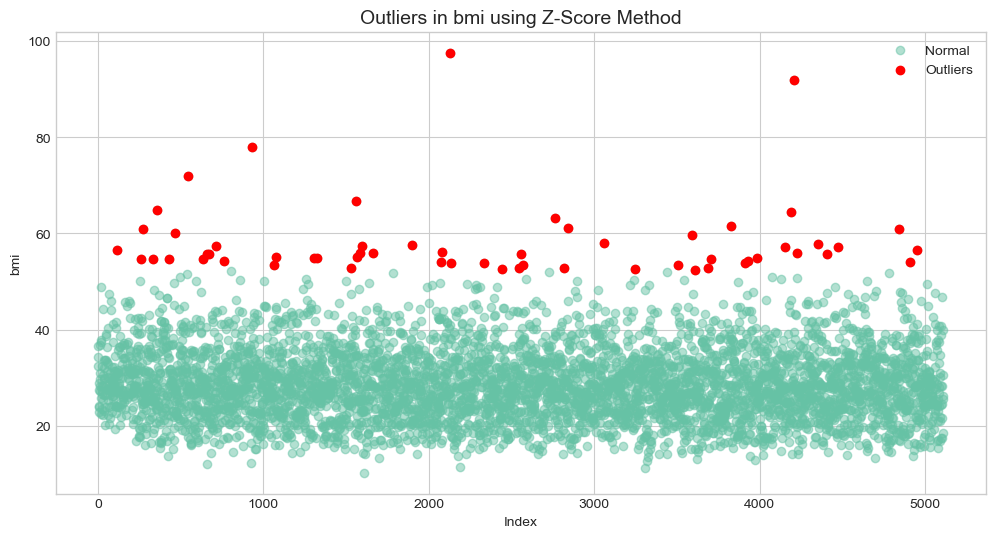

Number of outliers in bmi: 58
Outlier values: [56.6 54.6 60.9 54.7 64.8 54.7 60.2 71.9 54.6 55.7 55.7 57.5 54.2 78.
 53.4 55.2 55.  54.8 52.8 66.8 55.1 55.9 57.3 56.  57.7 54.  56.1 97.6
 53.9 53.8 52.7 52.8 55.7 53.5 63.3 52.8 61.2 58.1 52.7 53.4 59.7 52.5
 52.9 54.7 61.6 53.8 54.3 55.  57.2 64.4 92.  55.9 57.9 55.7 57.2 60.9
 54.1 56.6]
Min: 10.3, Max: 97.6, Mean: 28.89, Median: 28.10
--------------------------------------------------


In [18]:
# Function to detect outliers using z-score
def detect_outliers_zscore(df, col, threshold=3):
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    return df[z_scores > threshold]

# Detect and visualize outliers
for col in numerical_cols:
    outliers = detect_outliers_zscore(df, col)
    
    plt.figure(figsize=(12, 6))
    
    # Plot the data with outliers highlighted
    plt.scatter(range(len(df)), df[col], alpha=0.5, label='Normal')
    plt.scatter(df.index[df.index.isin(outliers.index)], 
                outliers[col], color='red', label='Outliers')
    
    plt.title(f'Outliers in {col} using Z-Score Method', fontsize=14)
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend()
    plt.show()
    
    print(f"Number of outliers in {col}: {len(outliers)}")
    if len(outliers) > 0:
        print(f"Outlier values: {outliers[col].values}")
        print(f"Min: {df[col].min()}, Max: {df[col].max()}, Mean: {df[col].mean():.2f}, Median: {df[col].median():.2f}")
    print("-" * 50)

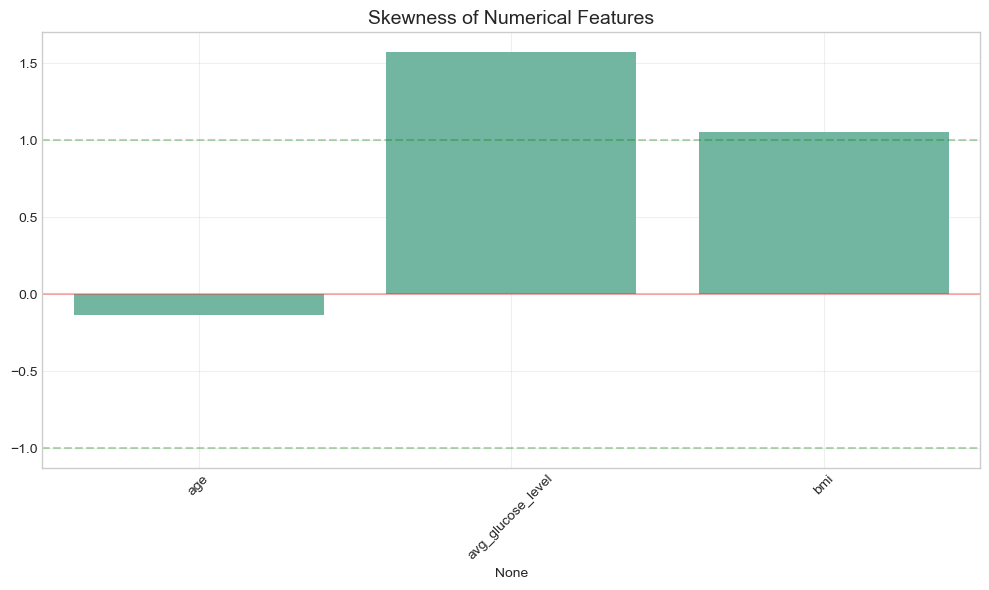

Skewness values:
age: -0.1371 - Approximately symmetric
avg_glucose_level: 1.5723 - Highly skewed
bmi: 1.0553 - Highly skewed


In [15]:
# Calculate and visualize skewness
skewness = df[numerical_cols].skew()

plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness.values)
plt.title('Skewness of Numerical Features', fontsize=14)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.axhline(y=1, color='g', linestyle='--', alpha=0.3)
plt.axhline(y=-1, color='g', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Skewness values:")
for col in numerical_cols:
    skew_val = df[col].skew()
    print(f"{col}: {skew_val:.4f} - {'Highly skewed' if abs(skew_val) > 1 else 'Moderately skewed' if abs(skew_val) > 0.5 else 'Approximately symmetric'}")

In [16]:
# Print summary statistics
print("Summary Statistics:")
print(df[numerical_cols].describe())

# Calculate IQR for each numerical column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)

Summary Statistics:
               age  avg_glucose_level          bmi
count  5110.000000        5110.000000  4909.000000
mean     43.226614         106.147677    28.893237
std      22.612647          45.283560     7.854067
min       0.080000          55.120000    10.300000
25%      25.000000          77.245000    23.500000
50%      45.000000          91.885000    28.100000
75%      61.000000         114.090000    33.100000
max      82.000000         271.740000    97.600000


In [17]:
# Create a copy of the dataframe for correlation analysis
df_corr = df.copy()

# Convert categorical variables to numeric for correlation analysis
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    df_corr[col] = pd.factorize(df_corr[col])[0]

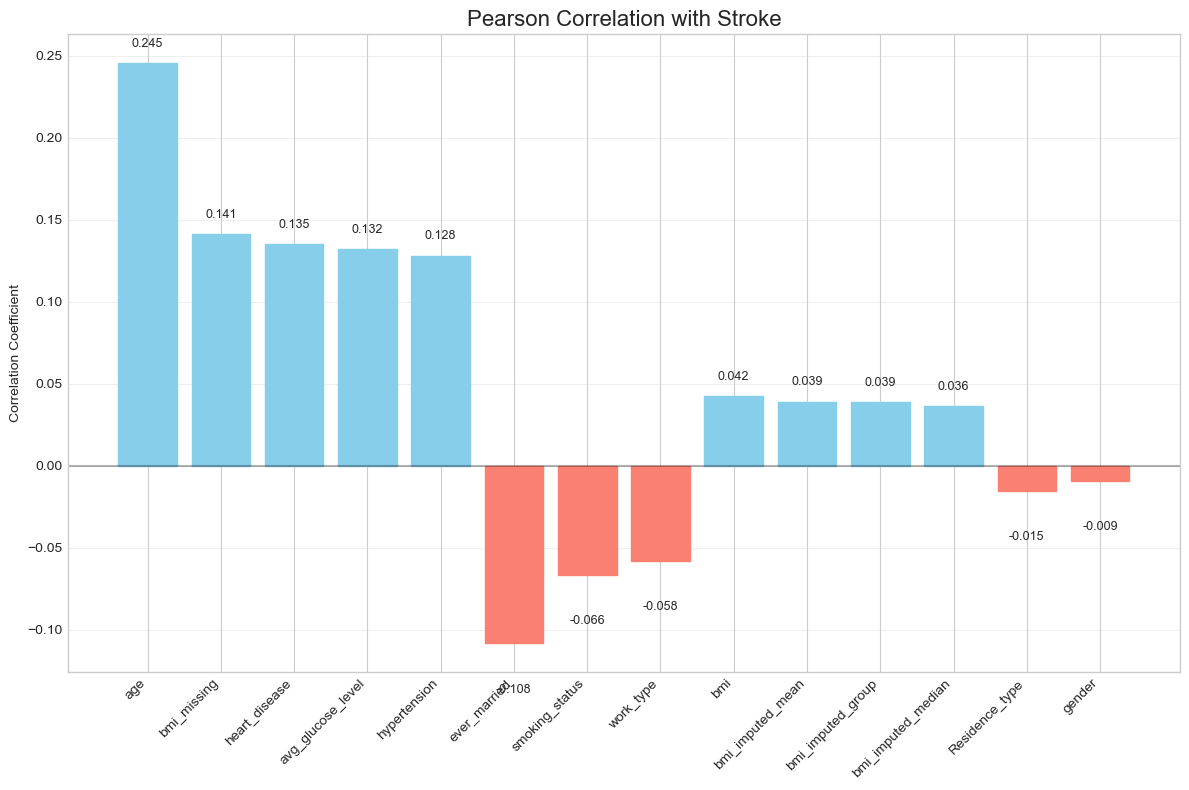

Pearson Correlation with Stroke:
age: 0.2453
bmi_missing: 0.1412
heart_disease: 0.1349
avg_glucose_level: 0.1319
hypertension: 0.1279
ever_married: -0.1083
smoking_status: -0.0664
work_type: -0.0582
bmi: 0.0424
bmi_imputed_mean: 0.0389
bmi_imputed_group: 0.0387
bmi_imputed_median: 0.0361
Residence_type: -0.0155
gender: -0.0092


In [18]:
# Calculate Pearson correlation for all features with stroke
numerical_cols = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease']
pearson_correlations = {}

for col in df_corr.columns:
    if col != 'stroke' and col != 'id':
        corr = df_corr[col].corr(df_corr['stroke'])
        pearson_correlations[col] = corr

# Sort correlations by absolute value
pearson_correlations = {k: v for k, v in sorted(pearson_correlations.items(), 
                                               key=lambda item: abs(item[1]), 
                                               reverse=True)}

# Visualize Pearson correlations
plt.figure(figsize=(12, 8))
bars = plt.bar(pearson_correlations.keys(), pearson_correlations.values())

# Color bars based on correlation direction
for i, bar in enumerate(bars):
    if list(pearson_correlations.values())[i] < 0:
        bar.set_color('salmon')
    else:
        bar.set_color('skyblue')

plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.title('Pearson Correlation with Stroke', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Correlation Coefficient')
plt.grid(axis='y', alpha=0.3)

# Add correlation values on top of bars
for i, v in enumerate(pearson_correlations.values()):
    plt.text(i, v + 0.01 if v >= 0 else v - 0.03, 
             f'{v:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Print Pearson correlations
print("Pearson Correlation with Stroke:")
for feature, corr in pearson_correlations.items():
    print(f"{feature}: {corr:.4f}")

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

In [20]:
# Identify numerical features to scale
numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Create a copy of the dataframe to avoid modifying the original
df_scaled = df.copy()

# Check the range of numerical features before scaling
print("Feature ranges before scaling:")
for feature in numerical_features:
    print(f"{feature}: Min = {df[feature].min():.2f}, Max = {df[feature].max():.2f}, Mean = {df[feature].mean():.2f}, Std = {df[feature].std():.2f}")

Feature ranges before scaling:
age: Min = 0.08, Max = 82.00, Mean = 43.23, Std = 22.61
avg_glucose_level: Min = 55.12, Max = 271.74, Mean = 106.15, Std = 45.28
bmi: Min = 10.30, Max = 97.60, Mean = 28.89, Std = 7.85


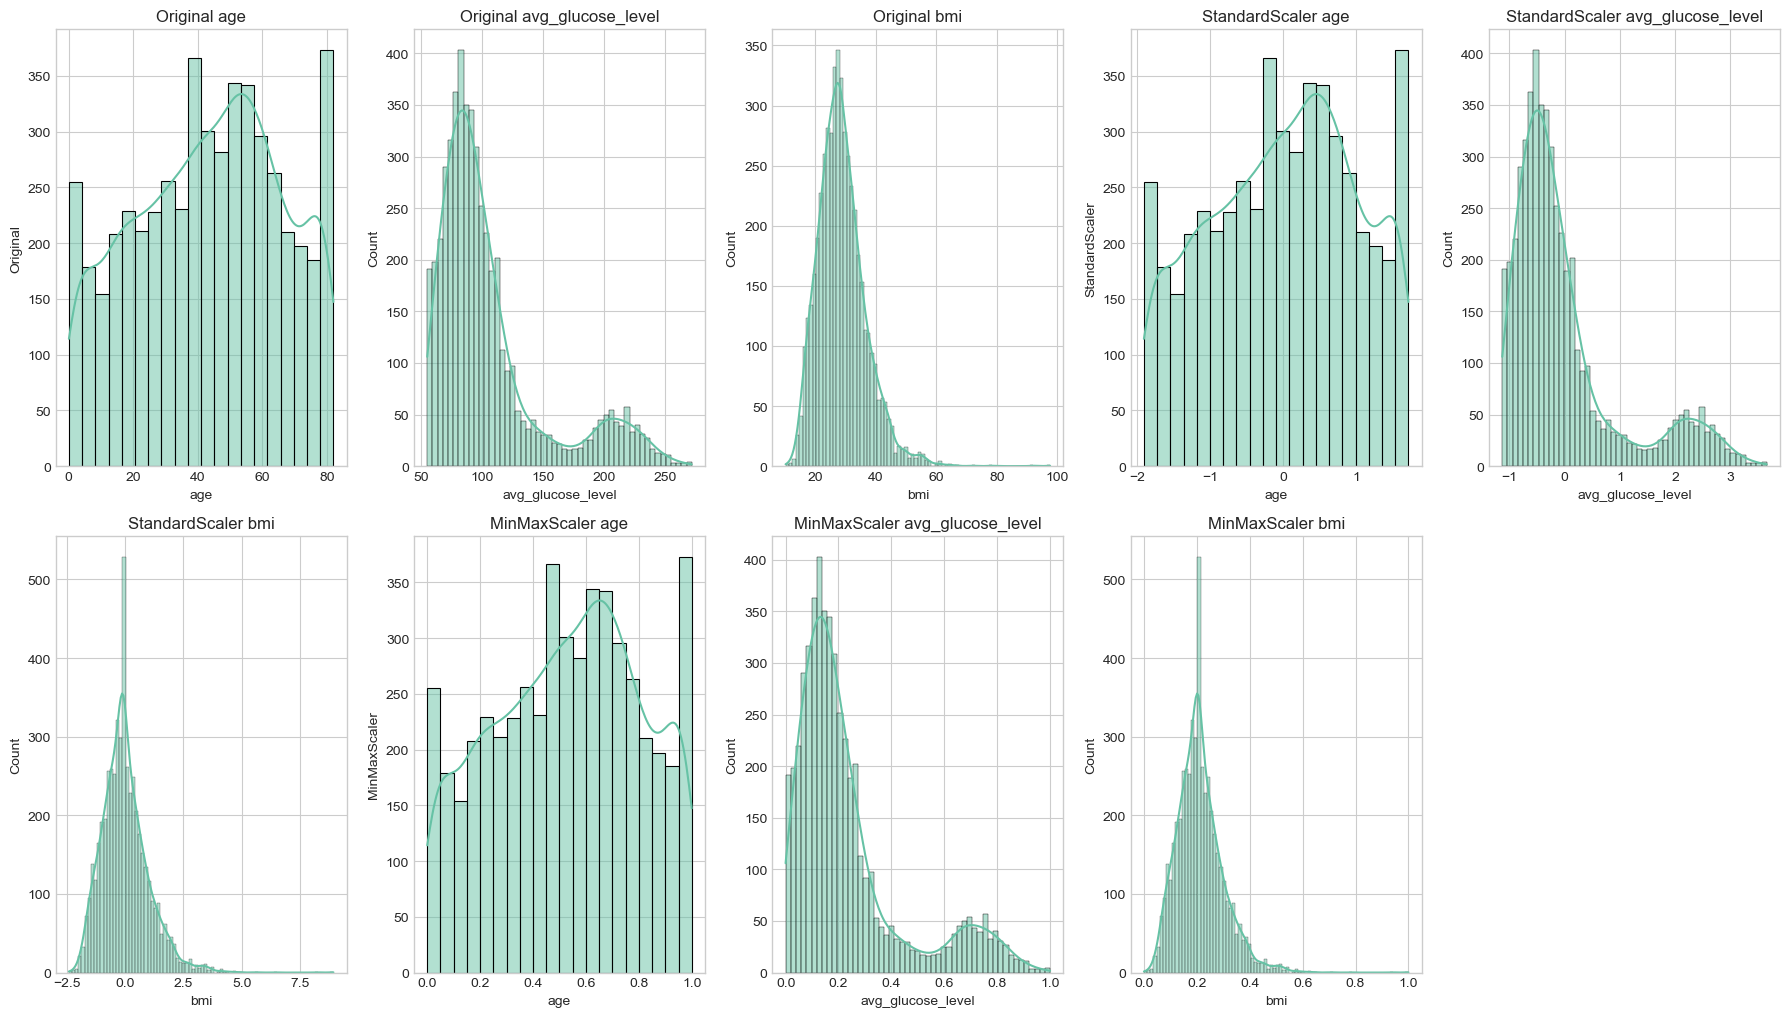

In [22]:
# Create a figure to visualize the effect of different scalers
plt.figure(figsize=(18, 15))
plot_idx = 1

# Original data distribution
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 5, plot_idx + i)
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Original {feature}')
    plt.xlabel(feature)
    if i == 0:
        plt.ylabel('Original')

plot_idx += len(numerical_features)

# 1. StandardScaler (Z-score normalization)
# Scales features to have mean=0 and variance=1
std_scaler = StandardScaler()
df_std_scaled = df_scaled.copy()
df_std_scaled[numerical_features] = std_scaler.fit_transform(df_scaled[numerical_features].fillna(df_scaled[numerical_features].median()))

for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 5, plot_idx + i)
    sns.histplot(df_std_scaled[feature], kde=True)
    plt.title(f'StandardScaler {feature}')
    plt.xlabel(feature)
    if i == 0:
        plt.ylabel('StandardScaler')

plot_idx += len(numerical_features)

# 2. MinMaxScaler (scales to a range, typically [0,1])
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df_scaled.copy()
df_minmax_scaled[numerical_features] = minmax_scaler.fit_transform(df_scaled[numerical_features].fillna(df_scaled[numerical_features].median()))

for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 5, plot_idx + i)
    sns.histplot(df_minmax_scaled[feature], kde=True)
    plt.title(f'MinMaxScaler {feature}')
    plt.xlabel(feature)
    if i == 0:
        plt.ylabel('MinMaxScaler')

plot_idx += len(numerical_features)


plt.tight_layout()
plt.show()

In [23]:
# Create a dataframe to compare the ranges after scaling
scaling_comparison = pd.DataFrame()

# Original data
for feature in numerical_features:
    scaling_comparison.loc['Original', f'{feature}_min'] = df[feature].min()
    scaling_comparison.loc['Original', f'{feature}_max'] = df[feature].max()
    scaling_comparison.loc['Original', f'{feature}_mean'] = df[feature].mean()
    scaling_comparison.loc['Original', f'{feature}_std'] = df[feature].std()

# StandardScaler
for feature in numerical_features:
    scaling_comparison.loc['StandardScaler', f'{feature}_min'] = df_std_scaled[feature].min()
    scaling_comparison.loc['StandardScaler', f'{feature}_max'] = df_std_scaled[feature].max()
    scaling_comparison.loc['StandardScaler', f'{feature}_mean'] = df_std_scaled[feature].mean()
    scaling_comparison.loc['StandardScaler', f'{feature}_std'] = df_std_scaled[feature].std()

# MinMaxScaler
for feature in numerical_features:
    scaling_comparison.loc['MinMaxScaler', f'{feature}_min'] = df_minmax_scaled[feature].min()
    scaling_comparison.loc['MinMaxScaler', f'{feature}_max'] = df_minmax_scaled[feature].max()
    scaling_comparison.loc['MinMaxScaler', f'{feature}_mean'] = df_minmax_scaled[feature].mean()
    scaling_comparison.loc['MinMaxScaler', f'{feature}_std'] = df_minmax_scaled[feature].std()



print("Comparison of feature ranges after scaling:")
print(scaling_comparison.round(3))

Comparison of feature ranges after scaling:
                age_min  age_max  age_mean  age_std  avg_glucose_level_min  \
Original          0.080   82.000    43.227   22.613                 55.120   
StandardScaler   -1.908    1.715     0.000    1.000                 -1.127   
MinMaxScaler      0.000    1.000     0.527    0.276                  0.000   

                avg_glucose_level_max  avg_glucose_level_mean  \
Original                      271.740                 106.148   
StandardScaler                  3.657                   0.000   
MinMaxScaler                    1.000                   0.236   

                avg_glucose_level_std  bmi_min  bmi_max  bmi_mean  bmi_std  
Original                       45.284   10.300   97.600    28.893    7.854  
StandardScaler                  1.000   -2.411    8.928    -0.000    1.000  
MinMaxScaler                    0.209    0.000    1.000     0.213    0.088  


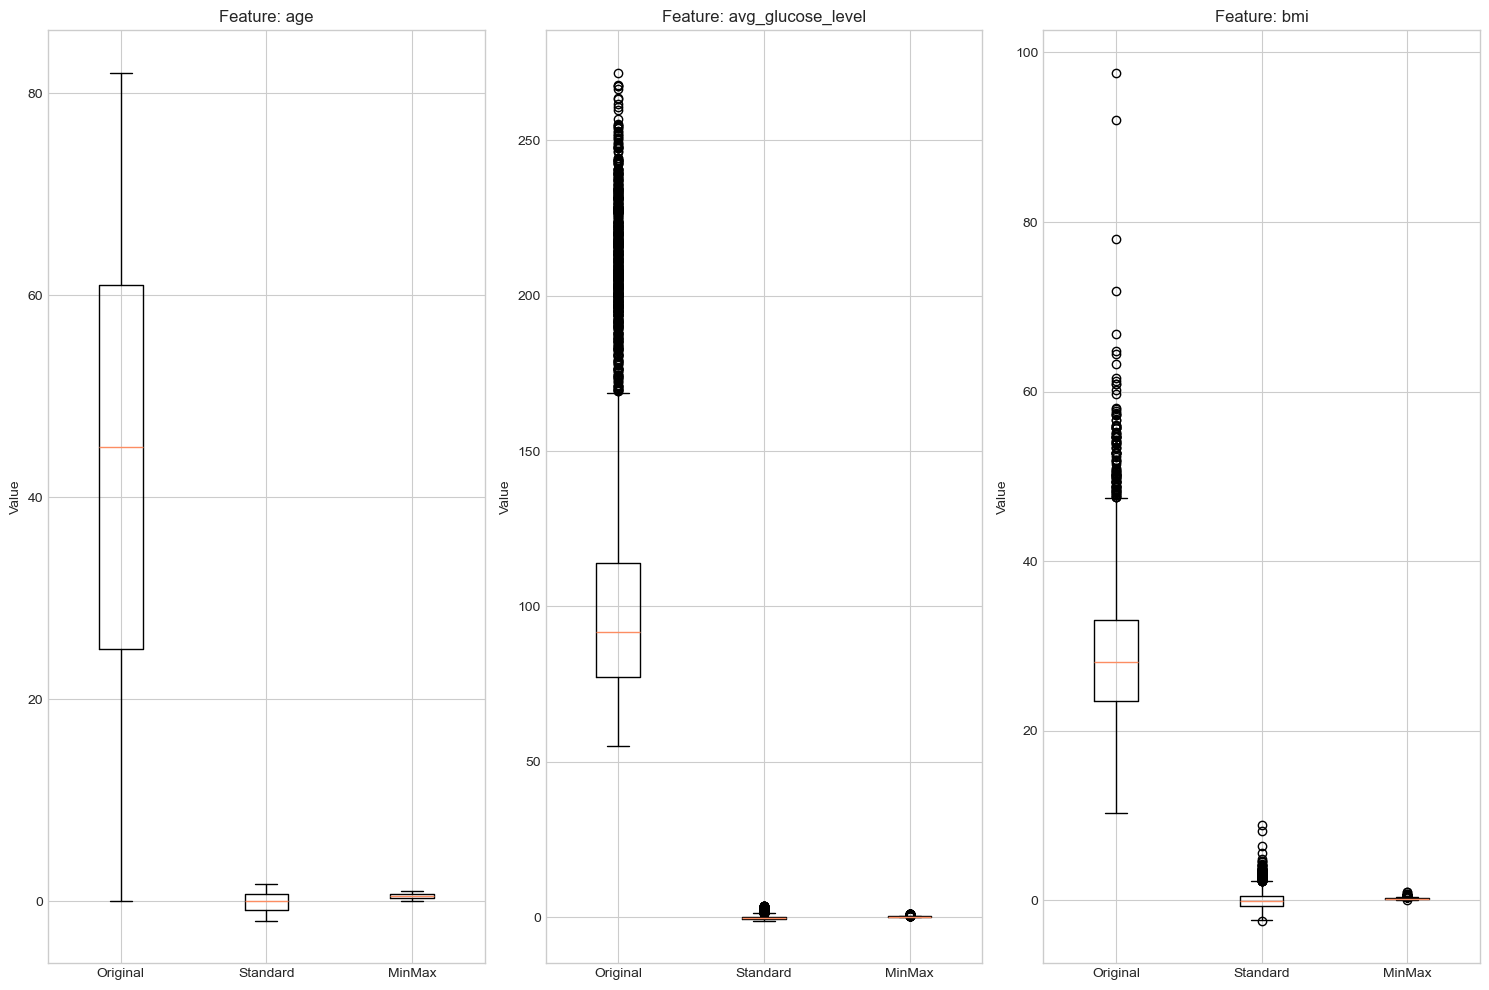

In [25]:
# Visualize the effect of scaling on feature ranges
plt.figure(figsize=(15, 10))

# Create box plots for each feature and scaling method
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i+1)
    
    data_to_plot = [
        df[feature].dropna(),
        df_std_scaled[feature].dropna(),
        df_minmax_scaled[feature].dropna()
    ]
    
    # Add the actual plotting commands
    plt.boxplot(data_to_plot)
    plt.title(f'Feature: {feature}')
    plt.xticks([1, 2, 3], ['Original', 'Standard', 'MinMax'])
    plt.ylabel('Value')
    
# Add some spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [29]:
# Import necessary library
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
# Assuming 'stroke' is your target variable
X = df.drop('stroke', axis=1)  # All columns except 'stroke'
y = df['stroke']  # Target variable

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify the split
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set shape: X_train: (4088, 15), y_train: (4088,)
Testing set shape: X_test: (1022, 15), y_test: (1022,)


In [30]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_missing,bmi_imputed_mean,bmi_imputed_median,bmi_imputed_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0,36.600000,36.6,36.6
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,1,28.893237,28.1,29.3
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,32.500000,32.5,32.5
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,34.400000,34.4,34.4
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,24.000000,24.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,1,28.893237,28.1,27.6
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0,40.000000,40.0,40.0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0,30.600000,30.6,30.6
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0,25.600000,25.6,25.6


In [37]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import time


# Identify categorical columns in your dataset
# Replace this with your actual categorical column names
categorical_columns = ['gender','ever_married','work_type','Residence_type','smoking_status']  # Add all categorical columns here

numerical_columns = [col for col in X_train.columns if col not in categorical_columns]

# Create preprocessing steps with imputation for missing values
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Add imputer for categorical features
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Add imputer for numerical features
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numerical_transformer, numerical_columns)
    ]
)


# Initialize dictionaries to store models and results
models = {}
results = {}

# 1. Logistic Regression
print("Training Logistic Regression...")
start_time = time.time()
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])
lr_pipeline.fit(X_train, y_train)
lr_pred = lr_pipeline.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
models['Logistic Regression'] = lr_pipeline
results['Logistic Regression'] = {
    'Accuracy': lr_accuracy,
    'Time': time.time() - start_time,
    'Default Hyperparameters': {
        'C': 1.0,
        'penalty': 'l2',
        'solver': 'lbfgs',
        'max_iter': 100,
        'random_state': 42
    }
}

# 2. SVM
print("Training SVM...")
start_time = time.time()
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])
svm_pipeline.fit(X_train, y_train)
svm_pred = svm_pipeline.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
models['SVM'] = svm_pipeline
results['SVM'] = {
    'Accuracy': svm_accuracy,
    'Time': time.time() - start_time,
    'Default Hyperparameters': {
        'C': 1.0,
        'kernel': 'rbf',
        'gamma': 'scale',
        'random_state': 42
    }
}

# 3. Decision Tree
print("Training Decision Tree...")
start_time = time.time()
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
dt_pipeline.fit(X_train, y_train)
dt_pred = dt_pipeline.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
models['Decision Tree'] = dt_pipeline
results['Decision Tree'] = {
    'Accuracy': dt_accuracy,
    'Time': time.time() - start_time,
    'Default Hyperparameters': {
        'criterion': 'gini',
        'splitter': 'best',
        'max_depth': None,
        'min_samples_split': 2,
        'min_samples_leaf': 1,
        'random_state': 42
    }
}

# 4. Random Forest
print("Training Random Forest...")
start_time = time.time()
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf_pipeline.fit(X_train, y_train)
rf_pred = rf_pipeline.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
models['Random Forest'] = rf_pipeline
results['Random Forest'] = {
    'Accuracy': rf_accuracy,
    'Time': time.time() - start_time,
    'Default Hyperparameters': {
        'n_estimators': 100,
        'criterion': 'gini',
        'max_depth': None,
        'min_samples_split': 2,
        'min_samples_leaf': 1,
        'bootstrap': True,
        'random_state': 42
    }
}

# 5. K-Nearest Neighbors
print("Training K-Nearest Neighbors...")
start_time = time.time()
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])
knn_pipeline.fit(X_train, y_train)
knn_pred = knn_pipeline.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
models['KNN'] = knn_pipeline
results['KNN'] = {
    'Accuracy': knn_accuracy,
    'Time': time.time() - start_time,
    'Default Hyperparameters': {
        'n_neighbors': 5,
        'weights': 'uniform',
        'algorithm': 'auto',
        'p': 2  # Euclidean distance
    }
}

# Display results
print("\nModel Performance Summary:")
for model_name, result in results.items():
    print(f"\n{model_name}:")
    print(f"  Accuracy: {result['Accuracy']:.4f}")
    print(f"  Training Time: {result['Time']:.2f} seconds")
    print("  Default Hyperparameters:")
    for param, value in result['Default Hyperparameters'].items():
        print(f"    {param}: {value}")
    
    # Detailed classification report
    if model_name == 'Logistic Regression':
        pred = lr_pred
    elif model_name == 'SVM':
        pred = svm_pred
    elif model_name == 'Decision Tree':
        pred = dt_pred
    elif model_name == 'Random Forest':
        pred = rf_pred
    elif model_name == 'KNN':
        pred = knn_pred
        
    print("\n  Classification Report:")
    print(classification_report(y_test, pred))

Training Logistic Regression...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Training SVM...
Training Decision Tree...
Training Random Forest...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Training K-Nearest Neighbors...

Model Performance Summary:

Logistic Regression:
  Accuracy: 0.9393
  Training Time: 0.28 seconds
  Default Hyperparameters:
    C: 1.0
    penalty: l2
    solver: lbfgs
    max_iter: 100
    random_state: 42

  Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.50      0.03      0.06        62

    accuracy                           0.94      1022
   macro avg       0.72      0.52      0.51      1022
weighted avg       0.91      0.94      0.91      1022


SVM:
  Accuracy: 0.9432
  Training Time: 0.21 seconds
  Default Hyperparameters:
    C: 1.0
    kernel: rbf
    gamma: scale
    random_state: 42

  Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.83      0.08      0.15        62

    accuracy                           0.94      1022
   macro avg  

In [39]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve
)
from sklearn.preprocessing import label_binarize

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# ----------
# Utility: evaluate model
# ----------
def evaluate_model(y_true, y_pred, y_score=None, model_name="Model"):
    """
    Evaluate model performance with multiple metrics.
    y_score may be:
      - None
      - 1D array of scores (for binary AUC)
      - 2D array of class probabilities / decision scores (for multiclass)
    """
    metrics = {}
    y_true = np.array(y_true)
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    metrics['F1 Score'] = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    auc_val = None
    if y_score is not None:
        try:
            # convert to numpy
            y_score = np.array(y_score)
            classes = np.unique(y_true)
            if y_score.ndim == 1:
                # single score vector (binary)
                auc_val = roc_auc_score(y_true, y_score)
            else:
                # 2D scores/probas
                if y_score.shape[1] == 2 and len(classes) == 2:
                    # binary but given as 2-column probs
                    auc_val = roc_auc_score(y_true, y_score[:, 1])
                else:
                    # multiclass: binarize and compute OvR weighted AUC
                    y_true_b = label_binarize(y_true, classes=classes)
                    # ensure shape match
                    if y_score.shape[1] == y_true_b.shape[1]:
                        auc_val = roc_auc_score(y_true_b, y_score, multi_class='ovr', average='weighted')
                    else:
                        # cannot compute multiclass AUC if shapes mismatch
                        auc_val = None
        except Exception:
            auc_val = None

    metrics['AUC'] = auc_val
    return metrics

# ----------
# Evaluate all models (robustly attempt predict_proba or decision_function)
# ----------
models_list = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN']
predictions = [lr_pred, svm_pred, dt_pred, rf_pred, knn_pred]  # your predicted labels
evaluation_results = {}
classification_reports = {}

for model_name, y_pred in zip(models_list, predictions):
    # try to gather a score (probabilities or decision function)
    score = None
    if model_name in models:
        mdl = models[model_name]
        try:
            score = mdl.predict_proba(X_test)
        except Exception:
            try:
                score = mdl.decision_function(X_test)
            except Exception:
                score = None
    # fallback: if there is a 1D predict_proba result stored elsewhere, provide it manually
    evaluation_results[model_name] = evaluate_model(y_test, y_pred, score, model_name)
    classification_reports[model_name] = classification_report(y_test, y_pred, zero_division=0)

# Put metrics into DataFrame
metrics_df = pd.DataFrame(evaluation_results).T
# Round numeric values for nicer printing
metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']] = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']].astype(float).round(4)
print("\nModel Performance Comparison:")
print(metrics_df)

# Save metrics
metrics_df.to_csv('model_evaluation_results.csv')

# Save classification reports
with open('classification_reports.txt', 'w') as f:
    for name, report in classification_reports.items():
        f.write(f"=== {name} ===\n")
        f.write(report + "\n\n")

# ----------
# 1) Bar chart comparing Accuracy / Precision / Recall / F1
# ----------
plt.figure(figsize=(10, 6))
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_df[metrics_to_plot].plot(kind='bar', rot=45, ylim=(0, 1), figsize=(10,6))
plt.title('Model Performance Comparison (basic metrics)')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('model_performance_bar.png')
plt.close()

# ----------
# 2) Confusion matrices (one plot per model)
# ----------
num_models = len(models_list)
cols = 3
rows = int(np.ceil(num_models / cols))
plt.figure(figsize=(6 * cols, 4 * rows))

for i, (model_name, y_pred) in enumerate(zip(models_list, predictions)):
    ax = plt.subplot(rows, cols, i + 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.close()

# ----------
# 3) ROC curves
# ----------
plt.figure(figsize=(10, 8))
unique_labels = np.unique(y_test)
is_binary = len(unique_labels) == 2

for model_name in models_list:
    score = None
    if model_name in models:
        try:
            score = models[model_name].predict_proba(X_test)
        except Exception:
            try:
                score = models[model_name].decision_function(X_test)
            except Exception:
                score = None

    # if we could not get a score, skip ROC for that model
    if score is None:
        continue

    try:
        if is_binary:
            # ensure 1D scores for ROC
            if score.ndim == 2 and score.shape[1] > 1:
                y_score = score[:, 1]
            else:
                y_score = score.ravel()
            fpr, tpr, _ = roc_curve(y_test, y_score)
            auc_val = evaluation_results[model_name]['AUC'] if evaluation_results[model_name]['AUC'] is not None else roc_auc_score(y_test, y_score)
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_val:.3f})')
        else:
            # multiclass: plot micro-average ROC and per-class if possible
            classes = np.unique(y_test)
            y_test_b = label_binarize(y_test, classes=classes)
            # score must be shape (n_samples, n_classes)
            if score.ndim == 1 or score.shape[1] != y_test_b.shape[1]:
                # cannot plot multiclass ROC for this model
                continue
            # per-class
            for i, cls in enumerate(classes):
                fpr, tpr, _ = roc_curve(y_test_b[:, i], score[:, i])
                auc_i = roc_auc_score(y_test_b[:, i], score[:, i])
                plt.plot(fpr, tpr, linestyle='--', label=f'{model_name} - class {cls} (AUC={auc_i:.3f})', alpha=0.6)

            # micro-average
            fpr_micro, tpr_micro, _ = roc_curve(y_test_b.ravel(), score.ravel())
            auc_micro = roc_auc_score(y_test_b, score, average='micro', multi_class='ovr')
            plt.plot(fpr_micro, tpr_micro, label=f'{model_name} micro (AUC={auc_micro:.3f})', linewidth=2)
    except Exception as ex:
        # skip if anything fails for that model
        print(f"Could not plot ROC for {model_name}: {ex}")
        continue

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right', fontsize='small')
plt.tight_layout()
plt.savefig('roc_curves.png')
plt.close()

# ----------
# Quick automated summary: best models by F1 and by AUC
# ----------
best_by_f1 = metrics_df['F1 Score'].idxmax()
best_by_auc = None
if 'AUC' in metrics_df.columns and metrics_df['AUC'].dropna().shape[0] > 0:
    best_by_auc = metrics_df['AUC'].idxmax()

print("\nQuick picks based on metrics:")
print(f"- Best by F1 score : {best_by_f1} (F1 = {metrics_df.loc[best_by_f1, 'F1 Score']:.4f})")
if best_by_auc is not None:
    print(f"- Best by AUC     : {best_by_auc} (AUC = {metrics_df.loc[best_by_auc, 'AUC']:.4f})")
else:
    print("- No AUC values available for ranking (no models produced scores).")

# Save a short text summary
with open('quick_model_summary.txt', 'w') as f:
    f.write("Model performance comparison (sorted by F1):\n")
    f.write(metrics_df.sort_values('F1 Score', ascending=False).to_string())
    f.write("\n\nBest by F1: " + str(best_by_f1))
    if best_by_auc:
        f.write("\nBest by AUC: " + str(best_by_auc))

print("\nSaved: model_evaluation_results.csv, model_performance_bar.png, confusion_matrices.png, roc_curves.png, classification_reports.txt, quick_model_summary.txt")



Model Performance Comparison:
                     Accuracy  Precision  Recall  F1 Score     AUC
Logistic Regression    0.9393     0.9143  0.9393    0.9136  0.8598
SVM                    0.9432     0.9372  0.9432    0.9207  0.6927
Decision Tree          0.9080     0.9066  0.9080    0.9073  0.5889
Random Forest          0.9432     0.9465  0.9432    0.9191  0.7924
KNN                    0.9393     0.9168  0.9393    0.9182  0.6672

Quick picks based on metrics:
- Best by F1 score : SVM (F1 = 0.9207)
- Best by AUC     : Logistic Regression (AUC = 0.8598)

Saved: model_evaluation_results.csv, model_performance_bar.png, confusion_matrices.png, roc_curves.png, classification_reports.txt, quick_model_summary.txt


<Figure size 1000x600 with 0 Axes>

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer


# Assuming your dataframe is df
X = df.drop("stroke", axis=1)
y = df["stroke"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define categorical and numeric columns
categorical_cols = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
numeric_cols = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]


# Preprocessor with imputation + encoding
preprocessor = ColumnTransformer(
    transformers=[
        # Categorical: impute missing with "missing", then one-hot encode
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_cols),
        
        # Numeric: impute missing with mean
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="mean"))
        ]), numeric_cols)
    ]
)

# ---------------- SVM Fine-Tuning ----------------
svm_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(probability=True))
])

svm_param_grid = {
    "classifier__C": [0.1, 1, 10],
    "classifier__kernel": ["linear", "rbf"],
    "classifier__gamma": ["scale", "auto"]
}

svm_grid = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, scoring="f1", n_jobs=-1)
svm_grid.fit(X_train, y_train)

print("Best SVM params:", svm_grid.best_params_)
print("Best SVM F1 score:", svm_grid.best_score_)

# ---------------- Logistic Regression Fine-Tuning ----------------
logreg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

logreg_param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__penalty": ["l2"],
    "classifier__solver": ["lbfgs", "liblinear"]
}

logreg_grid = GridSearchCV(logreg_pipeline, logreg_param_grid, cv=5, scoring="roc_auc", n_jobs=-1)
logreg_grid.fit(X_train, y_train)

print("Best Logistic Regression params:", logreg_grid.best_params_)
print("Best Logistic Regression AUC:", logreg_grid.best_score_)

Best SVM params: {'classifier__C': 10, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
Best SVM F1 score: 0.0730800604660449
Best Logistic Regression params: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best Logistic Regression AUC: 0.8407282456189911


In [43]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ---------------- Evaluation Function ----------------
def evaluate_model(y_true, y_pred, y_proba=None):
    metrics = {}
    metrics["Accuracy"] = accuracy_score(y_true, y_pred)
    metrics["Precision"] = precision_score(y_true, y_pred, average="weighted", zero_division=0)
    metrics["Recall"] = recall_score(y_true, y_pred, average="weighted", zero_division=0)
    metrics["F1"] = f1_score(y_true, y_pred, average="weighted", zero_division=0)
    if y_proba is not None:
        if y_proba.ndim == 1:  # if only 1 column
            metrics["AUC"] = roc_auc_score(y_true, y_proba)
        else:
            metrics["AUC"] = roc_auc_score(y_true, y_proba[:, 1])
    else:
        metrics["AUC"] = None
    return metrics


# -------- Baseline Models (Pre-tuning) --------
# Baseline SVM (default parameters)
svm_baseline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(probability=True, random_state=42))
])
svm_baseline.fit(X_train, y_train)
svm_pred_pre = svm_baseline.predict(X_test)
svm_proba_pre = svm_baseline.predict_proba(X_test)
eval_svm_pre = evaluate_model(y_test, svm_pred_pre, svm_proba_pre)

# Baseline Logistic Regression (default parameters)
logreg_baseline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])
logreg_baseline.fit(X_train, y_train)
lr_pred_pre = logreg_baseline.predict(X_test)
lr_proba_pre = logreg_baseline.predict_proba(X_test)
eval_lr_pre = evaluate_model(y_test, lr_pred_pre, lr_proba_pre)


# -------- Post-tuning (Best Models from GridSearch) --------
best_svm = svm_grid.best_estimator_
svm_pred_post = best_svm.predict(X_test)
svm_proba_post = best_svm.predict_proba(X_test)
eval_svm_post = evaluate_model(y_test, svm_pred_post, svm_proba_post)

best_lr = logreg_grid.best_estimator_
lr_pred_post = best_lr.predict(X_test)
lr_proba_post = best_lr.predict_proba(X_test)
eval_lr_post = evaluate_model(y_test, lr_pred_post, lr_proba_post)


# -------- Comparison Table --------
comparison = pd.DataFrame({
    "SVM Pre-Tuning": eval_svm_pre,
    "SVM Post-Tuning": eval_svm_post,
    "LR Pre-Tuning": eval_lr_pre,
    "LR Post-Tuning": eval_lr_post
})
print("\n=== Pre vs Post Tuning Comparison ===")
print(comparison)

# Save results
comparison.to_csv("pre_post_tuning_comparison.csv")



=== Pre vs Post Tuning Comparison ===
           SVM Pre-Tuning  SVM Post-Tuning  LR Pre-Tuning  LR Post-Tuning
Accuracy         0.951076         0.933464       0.952055        0.951076
Precision        0.904546         0.909872       0.954356        0.904546
Recall           0.951076         0.933464       0.952055        0.951076
F1               0.927228         0.920999       0.929612        0.927228
AUC              0.577901         0.580494       0.842469        0.842099


In [46]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# --------- Prepare preprocessed data for SHAP ----------
# Get the preprocessor from best LR model
preprocessor_lr = best_lr.named_steps["preprocessor"]

# Transform test set (returns array or sparse matrix)
X_test_transformed = preprocessor_lr.transform(X_test)

# Get feature names after one-hot encoding
def get_feature_names(preprocessor, numeric_cols, categorical_cols):
    cat_ohe = preprocessor.named_transformers_["cat"].named_steps["encoder"]
    cat_names = list(cat_ohe.get_feature_names_out(categorical_cols))
    return cat_names + numeric_cols

feature_names = get_feature_names(preprocessor_lr, numeric_cols, categorical_cols)

# Convert to DataFrame for SHAP
X_test_df = pd.DataFrame(
    X_test_transformed.toarray() if hasattr(X_test_transformed, "toarray") else X_test_transformed,
    columns=feature_names
)

# --------- Create SHAP explainer ----------
explainer = shap.LinearExplainer(best_lr.named_steps["classifier"], X_test_df)
shap_values = explainer(X_test_df)

# --------- Global Feature Importance ----------
plt.figure(figsize=(8,6))
shap.summary_plot(shap_values, X_test_df, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Logistic Regression)")
plt.tight_layout()
plt.savefig("shap_global_lr.png")
plt.close()

# --------- Local explanations for a subset of patients ----------
subset_idx = np.random.choice(X_test_df.shape[0], size=5, replace=False)
X_subset = X_test_df.iloc[subset_idx]
shap_values_subset = explainer(X_subset)

for i, idx in enumerate(subset_idx):
    shap.plots.waterfall(shap_values_subset[i], show=False)
    plt.title(f"SHAP Waterfall (Patient Index {idx})")
    plt.savefig(f"shap_waterfall_patient_{i+1}.png")
    plt.close()

print("SHAP analysis completed! Global and local plots saved.")


SHAP analysis completed! Global and local plots saved.


In [45]:
pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.6/547.6 kB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
